# Week1 One-way ANOVA
## 背景描述
在集成电路的许多生产步骤中，等离子蚀刻工艺被广泛应用。其原理是暴露在电子区域的气体形成等离子体，由此产生的电离气体原子通过电场加速时，会释放足够的力量蚀刻晶片表面。下图展示了一种典型的单晶片蚀刻设备的主要结构。其中射频（RF）发生器提供能源，在电极之间的间隙产生等离子。  
工程师要研究一套设备的射频（RF）功率设置与蚀刻率之间的关系。通过建立蚀刻率与射频功率之间关系的模型，来确定达到所需的目标蚀刻率的功率设置。这里检验射频功率的 4 个水平（160W ，180W，200W，220W），并在射频功率的每个水平上检验 5 个晶片。  
这是一个因子水平数 𝑎 = 4 和重复次数 𝑛 = 5 的单因子实验。
<img src="单晶片等离子蚀刻设备.png" alt="img" style="zoom:70%;"/>
## 数据描述
在进行实验之前，为了防止未知干扰因子的影响，随机化实验次序是必要的。假定按原始的非随机化次序做 20 次实验（也就是，前 5 个功率用 160 W，接下来的 5 个功率用 180 W，依次类推)。如果蚀刻设备有升温效应，则运行时间越长，设备温度就越高，这一情况将极有可能破坏实验的有效性。

In [2]:
import pandas as pd
print('Randomized test sequence: \n', pd.read_csv('T3_1_random.csv').values)

Randomized test sequence: 
 [[    1 12417   200]
 [    2 18369   220]
 [    3 21238   220]
 [    4 24621   160]
 [    5 29337   160]
 [    6 32318   180]
 [    7 36481   200]
 [    8 40062   160]
 [    9 43289   180]
 [   10 49271   200]
 [   11 49813   220]
 [   12 52286   220]
 [   13 57102   160]
 [   14 63548   160]
 [   15 67710   220]
 [   16 71834   180]
 [   17 77216   180]
 [   18 84675   180]
 [   19 89323   200]
 [   20 94037   200]]


| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Power | 射频功率 | categorical variable | [160, 180, 200, 220] |
| （因变量）Rate | 蚀刻率 | continuous variable | $\mathbb{R}$ |

In [3]:
print('Etch Rate Data (in Å/min) from the Plasma Etching Experiment: \n', pd.read_csv('T3_1.csv').values)

Etch Rate Data (in Å/min) from the Plasma Etching Experiment: 
 [[  1 160 575]
 [  2 160 542]
 [  3 160 530]
 [  4 160 539]
 [  5 160 570]
 [  1 180 565]
 [  2 180 593]
 [  3 180 590]
 [  4 180 579]
 [  5 180 610]
 [  1 200 600]
 [  2 200 651]
 [  3 200 610]
 [  4 200 637]
 [  5 200 629]
 [  1 220 725]
 [  2 220 700]
 [  3 220 715]
 [  4 220 685]
 [  5 220 710]]


## 问题 
注：这里使用 $\alpha=0.05$ 的显著性水平
1. 试判断 4 个射频功率水平下的蚀刻率是否存在差异.
2. 试判断该实验用One-way ANOVA模型是否恰当.
3. 估计 4 个射频功率水平下的均值和误差的方差.
4. 若Q1判断存在显著性差异，请进行多重比较.

## 解决方案
**Q1:**  
检验假设 $H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$ ;  $H_1: \mu_1, \mu_2, \mu_3, \mu_4$不全相等

In [39]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f

alpha = 0.05
a = 4
n = 5
x = pd.read_csv('T3_1.csv')
data = x.values[:,1:3]
# print(data)

# Sort them into groups, according to column 1("Power")
group1 = data[data[:,0] == 160,1]
group2 = data[data[:,0] == 180,1]
group3 = data[data[:,0] == 200,1]
group4 = data[data[:,0] == 220,1]

# Do the one-way ANOVA
df = pd.DataFrame(data, columns = ['power', 'rate'])   
model = ols('rate ~ C(power)', df).fit()
anovaResults = round(anova_lm(model), 2)
print('The ANOVA table: \n', anovaResults)  

F0, pVal1 = stats.f_oneway(group1, group2, group3, group4)
# 法1：
# print(pVal1)
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F = round(f.ppf(0.95,dfn = 3,dfd = 16), 2)
if F0 > F:
    print('Since F0 > F(0.05,3,16) = ', F, ', reject H0.')
else:
    print('Accept H0.') 
    

The ANOVA table: 
             df    sum_sq   mean_sq     F  PR(>F)
C(power)   3.0  66870.55  22290.18  66.8     0.0
Residual  16.0   5339.20    333.70   NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.05,3,16) =  3.24 , reject H0.


由方差分析表可知，P值小于 0.05 且F值大于 3.24，故拒绝原假设，即 4 个射频功率水平下的蚀刻率存在差异。

**Q2:**  
ANOVA模型： 
$y_{ij} = \mu + \tau_i + \epsilon_{ij}$ 的误差服从正态独立分布，其均值为零，方差为未知的常数$\sigma^2$。 
想要判断ANOVA模型是否恰当，可以利用残差检测来进行分析。  
处理 $i$ 的观测值 $j$ 的残差定义为：$e_{ij} = y_{ij} - \hat{y}_{ij}$  
其中$\hat{y}_{ij}$是对应于$y_{ij}$的一个估计， 
$\hat{y}_{ij} = \hat{\mu} + \hat{\tau}_i = \overline{y}_{··} + (\overline{y}_{i·} - \overline{y}_{··}) = \overline{y}_{i·}$  
  
**1. 独立性检验**  
【法1】利用残差的时序图，依照收集数据的时间顺序画出残差图有助于检测残差之间的相关性。

Text(0, 0.5, 'Residuals')

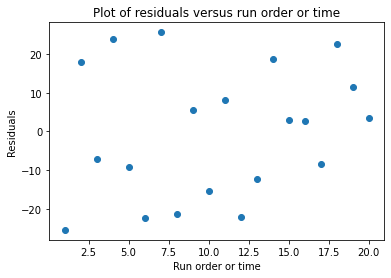

In [42]:
# 计算蚀刻率的残差
data_res = data.astype(float) * 1
list_power = [160, 180, 200, 220]
for k in list_power:
    cnt = data_res[data_res[:,0] == k,1]
    data_res[data_res[:,0] == k,1] = cnt - np.mean(cnt)

# 画出残差时序图，检测残差之间是否具有独立性
x = pd.read_csv('T3_1_random.csv')
random_seq = x.values[:,2]
data_seq = data_res * 1
order = []
for seq in random_seq:
    for power, rate in data_seq:
        if((seq == power) & (rate != 0)):
            order.append(round(rate,2))
            data_seq[data_seq[:,1] == rate,1] = 0
            break
x_order = np.linspace(1,20,20)
plt.scatter(x_order, order)
plt.title('Plot of residuals versus run order or time')
plt.xlabel('Run order or time')
plt.ylabel('Residuals')

由上图可知，没有理由去怀疑存在违反独立性的假定。  
  
【法2】利用Durbin-Watson检验，又称DW检验来做独立性检验。是用来检验分析中残差的一阶自相关性的。  
各残差的相关性方程为：$e_i = \rho * e_{i-1} + v_i$，检验的原假设为：$\rho = 0$，备择假设为：$\rho \neq 0$  
检验统计量为：$d = \frac{\sum^T_{t=2}\quad(e_i-e_{i-1})^2}{\sum^T_{t=1}\quad e_i^2}$  
该统计量值越接近 2 越好，一般在 1~3 之间说明没问题，小于 1 这说明残差存在自相关性（有临界值表可以查）。  
文献参考：https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic

In [32]:
# 用Durbin-Watson检验进行独立性检验
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
res = data_res[:, 1]
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：', round(dw,2))


Durbin-Watson检验的统计量为： 2.96


由分析可知，Durbin-Watson检验的统计量为：2.96，在 1~3 之间，故没有违反独立性的假定。  
  
**2. 方差齐性检验**  
【法1】Bartlett检验的核心思想是通过求取不同组之间的卡方统计量，然后根据卡方统计量的值来判断组间方差是否相等。该方法极度依赖于数据是正态分布，如果数据非正态分布，则的出来的结果偏差很大。  
Bartlett检验统计量为：$\chi_0^2 = 2.3026\frac{q}{c}$  
其中，$q = (N - a)log_{10}S_p^2 - \sum_{i=1}^a(n_i - 1)log_{10}S_i^2$  
$c = 1 + \frac{1}{3(a-1)}(\sum_{i=1}^a(n_i-1)^{-1} - (N - a)^{-1})$  
$S_p^2 = \frac{\sum_{i=1}^a\quad(n_i-1)S_i^2}{N - a}$ 且$S_i^2$是第 $i$ 个总体的样本方差；当$\chi_0^2 > \chi_{\alpha,a-1}^2$ 时，拒绝$H_0$，其中$\chi_{\alpha,a-1}^2$是自由度为$a-1$的卡方分布上的 $\alpha$ 分位数。

In [33]:
# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(group1, group2, group3, group4)
bart_stat = stats.chi2.isf(alpha, a-1)

# 法1：
print('Bartlett检验的P值为：', round(pVal2, 2))
if pVal2 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

# 法2：
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('Since 𝜒_0^2 > 𝜒_(𝛼,𝑎−1)^2, reject H0.')
else:
    print('Accept H0')  


Bartlett检验的P值为： 0.93
Accept H0
Bartlett检验统计量： 0.43
𝜒_(𝛼,𝑎−1)^2:  7.81
Accept H0


由分析可知，Bartlett检验的P值大于 0.05 且Bartlett检验统计量小于 9.49，故接受原假设，即残差具有方差齐性。  
  
【法2】Levene检验是将每个值先转换为该值与其组内均值的偏离程度，然后再用转换后的偏离程度去做方差分析，即组间方差/组内方差。修正后的Levene检验中的均值采用中位数的计算方法，因此这里的偏差用每个处理的观测值$y_{ij}$与该处理中的中位数$\tilde{y}_{i·}$的偏差的绝对值来表示：$d_{ij} = |y_{ij} - \tilde{y}_{i·}|, i = 1,2,···,a;j = 1,2,···,n$

In [34]:
# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(group1, group2, group3, group4)
print('Levene检验的P值为：', round(pVal3, 2))
if pVal3 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  
   

Levene检验的P值为： 0.9
Accept H0


由分析可知，Levene检验的P值大于 0.05，故残差具有方差齐性。

**3. 正态性检验**  
【法1】利用qq图（The quantitle-quantile plot），来检验数据分布的相似性。令X轴为正态分布的分位数，Y轴为样本分位数，如果这两者构成的点分布在一条直线上，就证明样本数据与正态分布存在线性相关性，即服从正态分布。

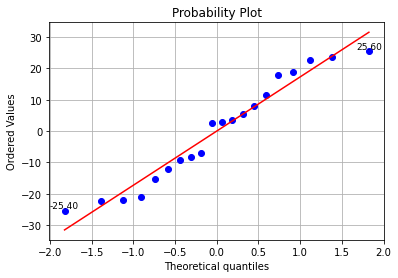

[-25.4 -22.4 -22.  -21.2 -15.4 -12.2  -9.2  -8.4  -7.    2.6   3.    3.6
   5.6   8.   11.6  18.   18.8  22.6  23.8  25.6]


In [35]:
# 用qq图进行正态性检验
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x1 = osm[0][0]
y1 = osm[1][0]
plt.text(x1, y1, '%.2f' % float(y1), ha = 'center', va = 'bottom',fontsize = 9)
x2 = osm[0][-1]
y2 = osm[1][-1]
plt.text(x2, y2, '%.2f' % float(y2), ha = 'center', va = 'bottom',fontsize = 9)
plt.grid()
plt.show()

print(osm[1])

由上图可以看出，总体上来看，误差分布是近似正态的；qq图在右边稍向下弯曲，在左边稍有上翘，这意味着误差分布的尾部比起正态分布的尾部要更薄一些；也就是说，最大的残差不完全如所期望的那样大。  
检测异常值的方法：  
计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。  
由上述公式得 $d_1 = \frac{e_1}{\sqrt{MS_E}} = \frac{25.6}{\sqrt{333.70}} = 1.40 < 2$，故可说明无明显的异常值，即残差是服从正态分布的。  
  
【法2】利用Shapiro-Wilk检验来做正态性检验，其原假设：样本数据符合正态分布。（注：适用于小样本）  
利用方法stats.shapiro()检验正态性，输出结果中第一个为统计量，第二个为P值（统计量越接近 1 越表明数据和正态分布拟合的好，P值大于指定的显著性水平，接受原假设，认为样本来自服从正态分布的总体）

In [36]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal4 = stats.shapiro(res)
print(round(SW, 2))
print(round(pVal4, 2))

if pVal4 > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null null hypothesis') 

0.94
0.22

Accept the null hypothesis.


由上述分析可知，统计量为 0.94，接近 1；且P值为 0.22，大于指定的显著性水平 0.05。故认为残差来自服从正态分布的总体。  

**Q3:**  

In [301]:
# Estimation of Parameter(𝜎2 and 𝜇𝑖 )
mu_1 = np.mean(group1)
mu_2 = np.mean(group2)
mu_3 = np.mean(group3)
mu_4 = np.mean(group4)

mu = [mu_1, mu_2, mu_3, mu_4]

sse = 0
for i in range(a):
    se = 0
    power_list = data[data[:,0] == (160 + i * 20),1]
    for j in range(n):
        se += (power_list[j] - mu[i]) ** 2
    sse += se
var = round(sse / (a * (n - 1)),2) 
print('Estimate of the population mean：{0}'.format(mu))
print('An estimate of the population variance：{0}'.format(var))



Estimate of the population mean：[551.2, 587.4, 625.4, 707.0]
An estimate of the population variance：333.7


由上述分析可知，4 个射频功率水平下均值的估计值分别为：551.2, 587.4, 625.4, 707.0  
其方差的估计值为：333.7

**Q4:**  
由Q1的分析可知，4 个射频功率水平下的蚀刻率存在显著性差异，故进行多重比较。这里采用Fisher最小显著性差异（LSD）方法。  
检验：$H_0: \mu_i = \mu_j$ vs $H_1: \mu_i \neq \mu_j$  
检验统计量：$t_0 = \frac{\overline{y}_{i·} - \overline{y}_{j·}}{\sqrt{MS_E·2/n}}$  
当$|\overline{y}_{i·} - \overline{y}_{j·}| > t_{\frac{\alpha}{2},N-a}\sqrt{MS_E·2/n}$时，拒绝原假设，可表明均值对$\mu_i$与$\mu_j$有显著性差异。

In [305]:
#LSD(least significant difference)最小显著差异
def LSD():   
    df = a * (n-1)
    t_value = stats.t(df).isf(alpha / 2)    
    mse = var
    lsd = t_value * math.sqrt(2.0 * mse / n)
    # print(lsd)
    return lsd

for i in range(a):
    for j in range(i + 1,a):
        dist = round(abs(mu[i] - mu[j]), 1)
        print('The difference between group', i + 1, 'and group', j + 1, ': ', dist)
print('Value of LSD: ', round(LSD(),2))
        
cmp = 0
for s in range(a):
    for t in range(i + 1, a):
        lsd = LSD()
        dist = round(abs(mu[s] - mu[t]), 1)
        if(dist < lsd):
            print('No difference between group', s + 1, 'and group', t + 1, ': ')
            cmp += 1
if(cmp == 0):
    print('Reject H0, and there is significant difference in the mean value of any two treatments')




The difference between group 1 and group 2 :  36.2
The difference between group 1 and group 3 :  74.2
The difference between group 1 and group 4 :  155.8
The difference between group 2 and group 3 :  38.0
The difference between group 2 and group 4 :  119.6
The difference between group 3 and group 4 :  81.6
Value of LSD:  24.49
Reject H0, and there is significant difference in the mean value of any two treatments


由于LSD临界值小于任意两种处理均值的差，故拒绝原假设，认为任意两种处理均值存在显著性差异。

## 第一周练习题
数据集：Project1.csv(内附文档)  
统计方法：One-way ANOVA    
作业发到邮箱：51205903029@stu.ecnu.edu.cn  
压缩包名字：学号-姓名  
Deadline：下周二之前交  
注：要有完整的解题过程，不能只有代码